   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

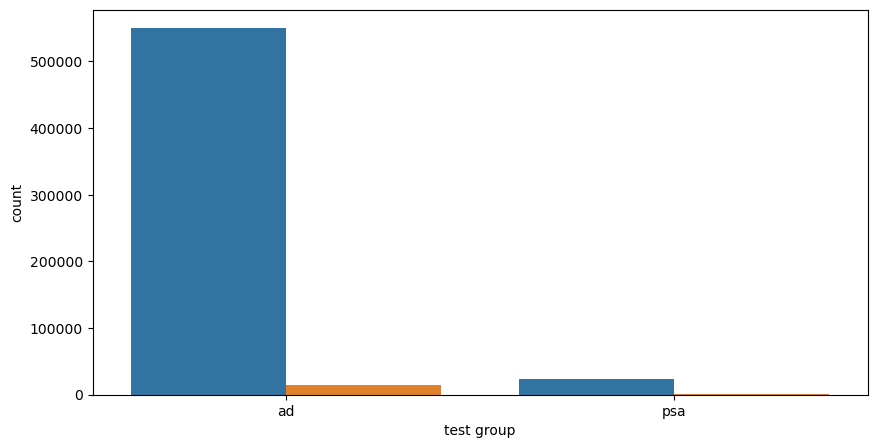

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Загружаем данные из CSV файла
data = pd.read_csv(r"C:\Users\elena.mordvinova\PYT\L_DZ\marketing_AB.csv")

# Обзор данных
print(data.head())
print(data.info())

# Описательные статистики
print(data.describe())

# Проверка на пропуски
print(data.isnull().sum())

# Визуализация категориальных переменных
plt.figure(figsize=(10, 5))
sns.countplot(x='test group', hue='converted', data=data)
plt.title('Распределение по группам тестирования и конверсии')
plt.show()

# Визуализация числовой переменной
plt.figure(figsize=(10, 5))
sns.boxplot(x='test group', y='total ads', data=data)
plt.title('Количество рекламных объявлений по группам тестирования')
plt.show()

# Гистограмма количества рекламных объявлений
plt.figure(figsize=(10, 5))
sns.histplot(data['total ads'], bins=20, kde=True)
plt.title('Распределение по количеству рекламных объявлений')
plt.show()

# Очистка данных
# Удаление строк с пропусками
data_cleaned = data.dropna()

# Удаление выбросов
Q1 = data_cleaned['total ads'].quantile(0.25)
Q3 = data_cleaned['total ads'].quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data_cleaned[(data_cleaned['total ads'] >= (Q1 - 1.5 * IQR)) & 
                             (data_cleaned['total ads'] <= (Q3 + 1.5 * IQR))]
print(data_cleaned.describe())

# Тест на нормальность
stat, p = stats.shapiro(data_cleaned['total ads'])
print('Статистика:', stat)
print('p-value:', p)

# QQ-plot
plt.figure(figsize=(10, 5))
stats.probplot(data_cleaned['total ads'], dist="norm", plot=plt)
plt.title('QQ-plot of total ads')
plt.show()

# Гистограмма с KDE после очистки
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['total ads'], bins=20, kde=True)
plt.title('Распределение по количеству рекламных объявлений после очистки')
plt.show()

# Тест взаимосвязи двух категориальных переменных
contingency_table = pd.crosstab(data_cleaned['test group'], data_cleaned['converted'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi2 Stat: {chi2}, p-value: {p}')
if p < 0.05:
    print("Существует статистически значимая связь между группой тестирования и конверсией.")
else:
    print("Нет статистически значимой связи между группой тестирования и конверсией.")

# Тест средних между группами
group1 = data_cleaned[data_cleaned['test group'] == 'ad']['total ads']
group2 = data_cleaned[data_cleaned['test group'] == 'psa']['total ads']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, p-value: {p_value}')
if p_value < 0.05:
    print("Средние значения количества рекламных объявлений в группах различаются.")
else:
    print("Нет статистически значимых различий в средних значениях между группами.")

# Корреляция между total ads и converted
data_cleaned['converted_num'] = data_cleaned['converted'].astype(int)
correlation = data_cleaned[['total ads', 'converted_num']].corr().iloc[0, 1]
print(f'Корреляция между количеством рекламных объявлений и конверсией: {correlation}')
# Гипотеза :а) Существует связь между группой тестирования (ad vs psa) и конверсией; ожидается, что группа ‘ad’ будет иметь более высокий уровень конверсии. б) Среднее количество рекламных объявлений различается между группами ‘ad’ и ‘psa’, и предполагается положительная корреляция между количеством рекламных объявлений и вероятностью конверсии. 
# Вывод: Рекомендуется использовать рекламные объявления более эффективно, основываясь на значимой связи между группами и конверсией, а также оптимизировать количество объявлений для повышения вероятности успешной конверсии, так как исследования показали положительную корреляцию между количеством рекламных объявлений и конверсией.
#Тип рекламы в группе ‘ad’ успешнее,  у нее выше уровень конверсии по сравнению с группой ‘psa’